In [1]:
import pandas as pd
import seaborn as sns
from re import sub as regex
from nltk import sent_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer as Stemmer
from imblearn.under_sampling import RandomUnderSampler

<p style="text-align: center;">SMS Processing</p>

In [2]:
df = pd.read_csv("spam.csv", encoding="latin")
df = df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
df["type"] = (df["type"] == "spam").astype(int)
# Removes special characters - only letters and numbers remain + lowers text
df["filteredSMS"] = df["sms"].apply(lambda sms: regex(r"[^a-zA-Z0-9]", " ", sms.lower()))
# Utilizes NLTK to tokenize text
df["filteredSMS"] = df["filteredSMS"].apply(lambda sms: word_tokenize(sms))
# Utilizes removes NLTK stopwords from sms
df["filteredSMS"] = df["filteredSMS"].apply(lambda sms: [word for word in sms if word not in stopwords.words("english")])
# Removing SMS if SMS is empty after removing all stopwords
df = df.dropna()
# Utilizes NLTK Stemmer to stem words
df["filteredSMS"] = df["filteredSMS"].apply(lambda sms: [Stemmer().stem(word) for word in sms])
# Saves the processed sms in a string
df["processedSMS"] = df["filteredSMS"].apply(lambda sms: " ".join(sms))
df.sample(5)

,type,sms,filteredSMS,processedSMS
163,1,-PLS STOP bootydelious (32/F) is inviting you ...,"[pl, stop, bootydeli, 32, f, invit, friend, re...",pl stop bootydeli 32 f invit friend repli ye 4...
5450,0,Sac needs to carry on:),"[sac, need, carri]",sac need carri
2050,0,Hi where you. You in home or calicut?,"[hi, home, calicut]",hi home calicut
1321,0,"I wake up long ago already... Dunno, what othe...","[wake, long, ago, alreadi, dunno, thing]",wake long ago alreadi dunno thing
3356,0,"Brainless Baby Doll..:-D;-), vehicle sariyag d...","[brainless, babi, doll, vehicl, sariyag, drive...",brainless babi doll vehicl sariyag drive madok...


<p style="text-align: center;">Data Visualization</p>

Text(0, 0.5, 'Number of SMS')

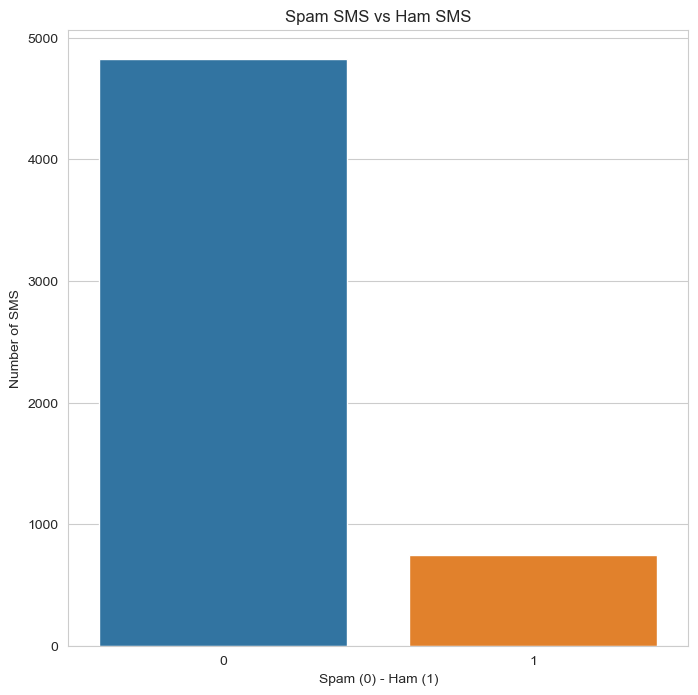

In [3]:
plt.figure(figsize=(8, 8))
sns.countplot(x="type", data=df)
plt.title("Spam SMS vs Ham SMS")
plt.xlabel("Spam (0) - Ham (1)")
plt.ylabel("Number of SMS")

S:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
S:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


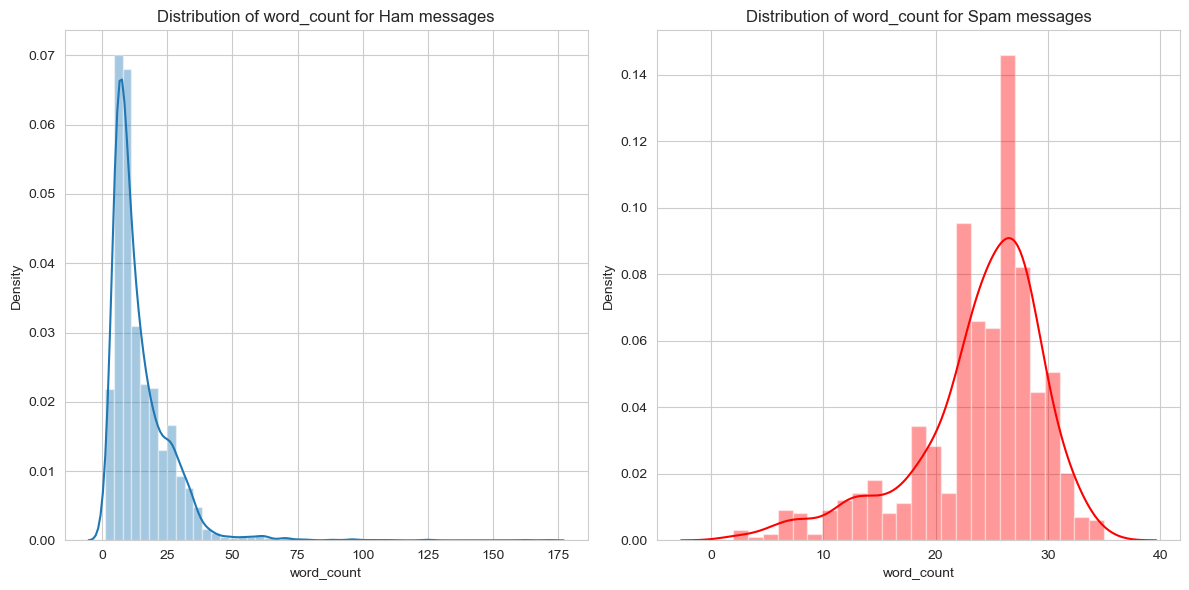

In [4]:
plt.figure(figsize=(12, 6))
df["word_count"] = df["sms"].apply(lambda sms: len(sms.split()))

plt.subplot(1, 2, 1)
sns.distplot(a=df[df["type"] == 0].word_count)
plt.title("Distribution of word_count for Ham messages")

plt.subplot(1, 2, 2)
sns.distplot(a=df[df["type"] == 1].word_count, color="red")
plt.title("Distribution of word_count for Spam messages")

plt.tight_layout()
plt.show()

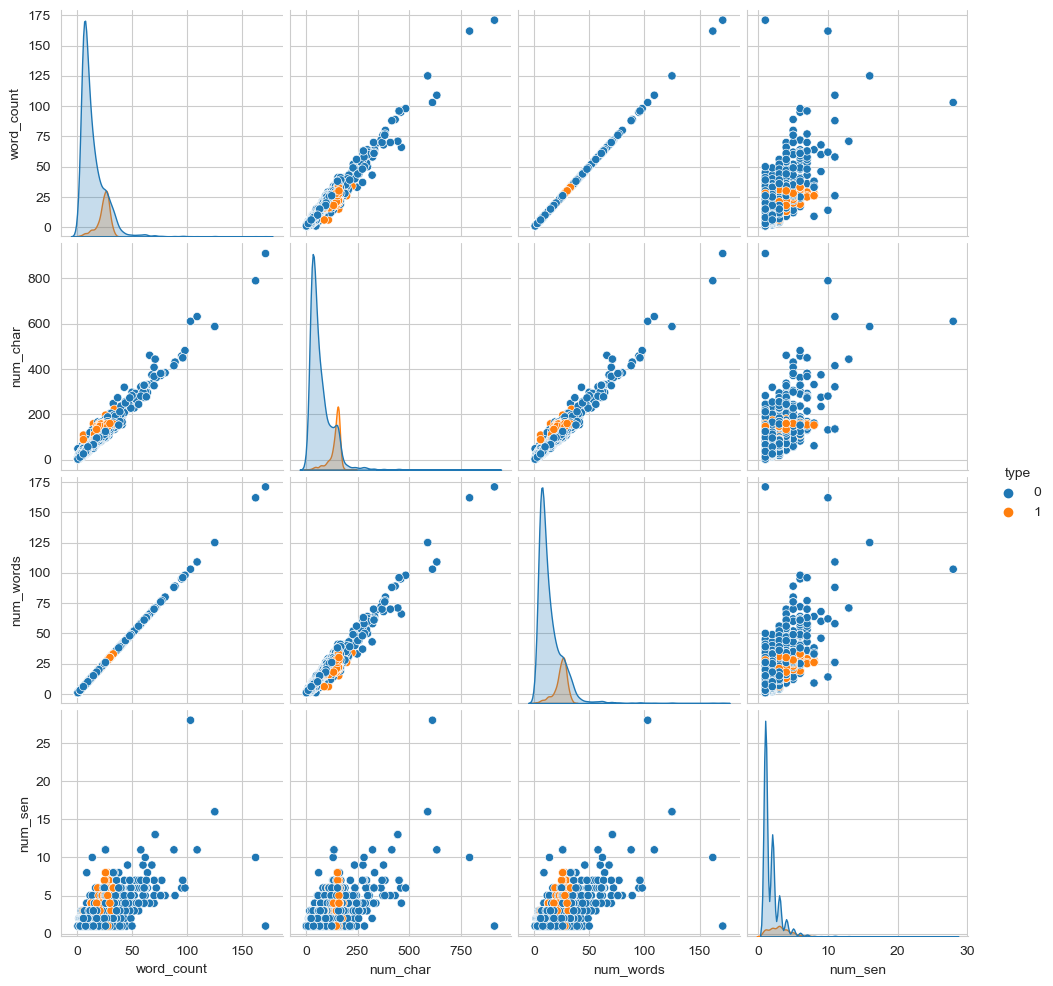

In [5]:
df["num_char"]= df["sms"].apply(len)
df["num_words"]= df["sms"].apply(lambda sms: len(str(sms).split()))
df["num_sen"]= df["sms"].apply(lambda sms: len(sent_tokenize(sms)))
sns.pairplot(df, hue="type")
plt.show()

In [6]:
def words(category):
    word_bank = ""
    for sms, label in zip(df["sms"], df["type"]):
        if label == category:
            sms = sms.lower()
            sms = regex("[^a-z]+", " ", sms)
            sms = word_tokenize(sms)
            sms = [word for word in sms if word not in stopwords.words("english")]
            sms = " ".join(sms)
            word_bank += sms
    return word_bank

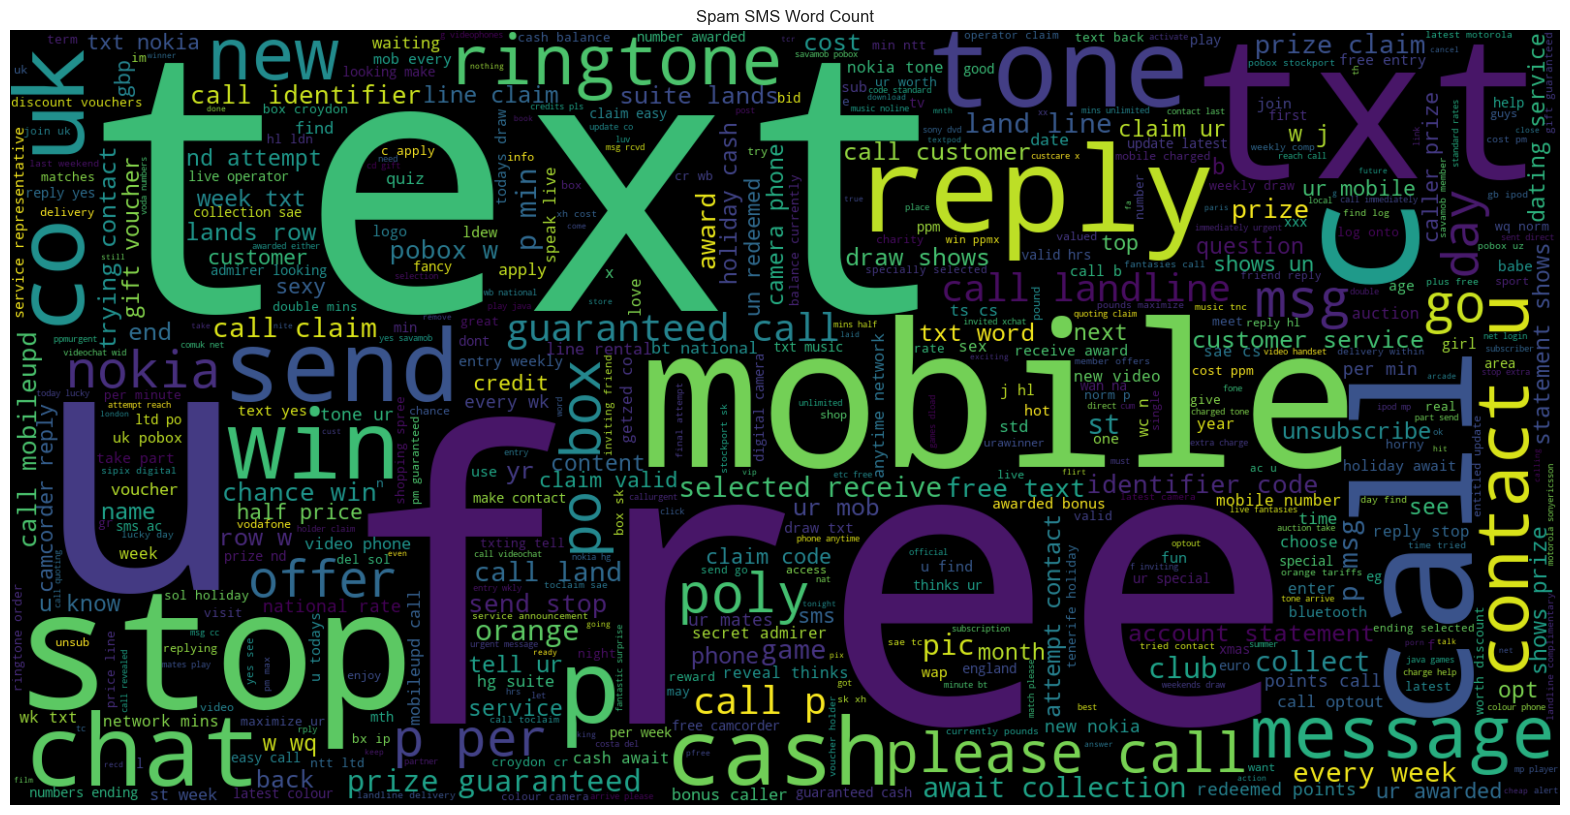

In [7]:
plt.figure(figsize = (20, 20))
plt.imshow(WordCloud(width = 1600 , height = 800 , max_words = 500,background_color="black").generate(words(1)) , interpolation = "bilinear")
plt.title("Spam SMS Word Count")
plt.axis("off")
plt.show()

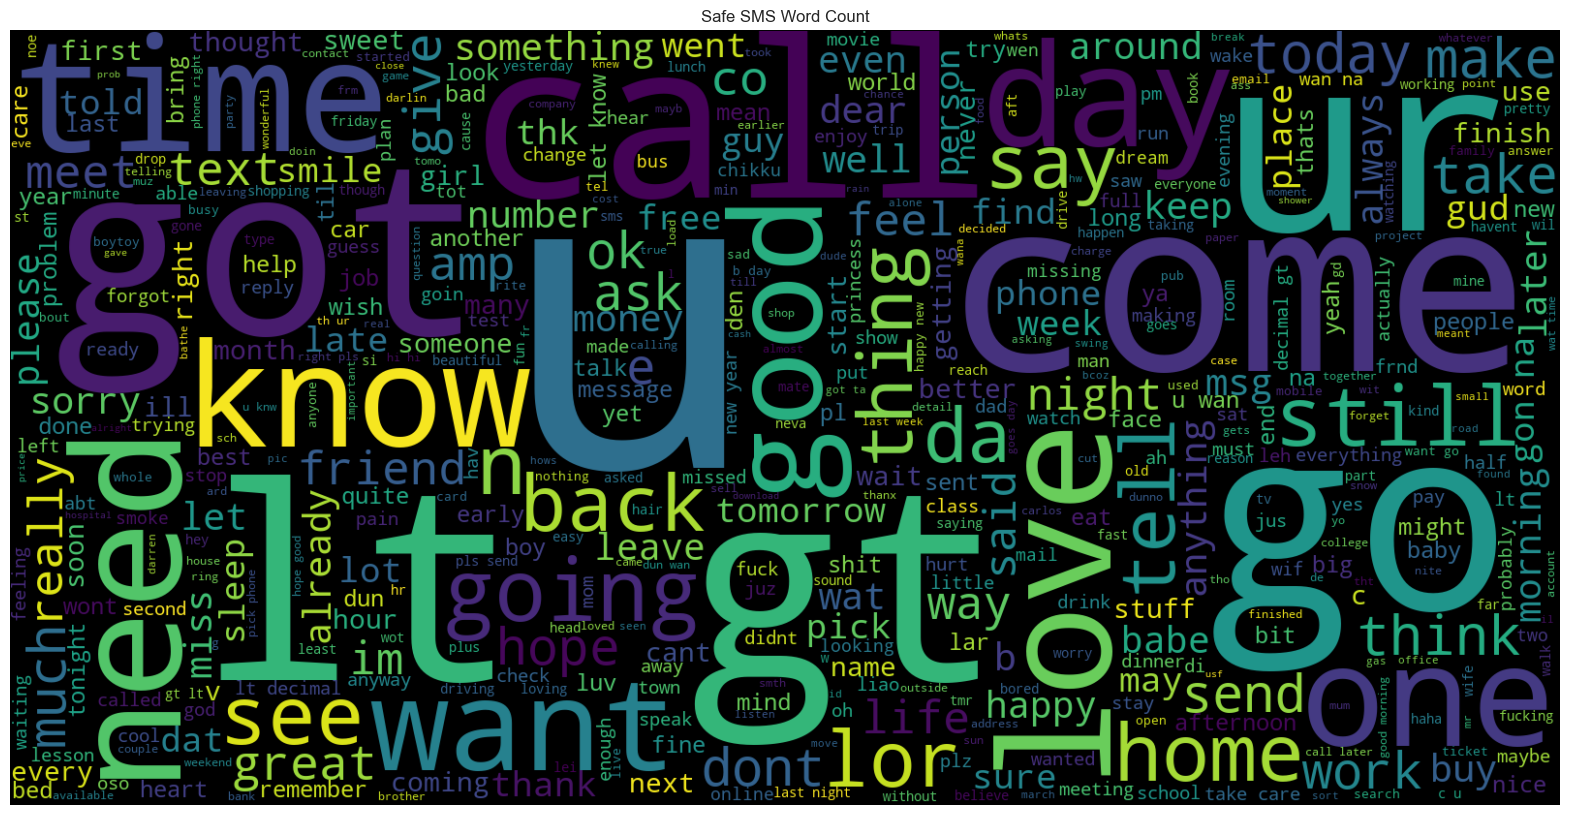

In [8]:
plt.figure(figsize = (20, 20))
plt.imshow(WordCloud(width = 1600 , height = 800 , max_words = 500,background_color="black").generate(words(0)) , interpolation = "bilinear")
plt.title("Safe SMS Word Count")
plt.axis("off")
plt.show()

<p style="text-align: center;">Class Imbalance</p>

Ham (0) vs Spam (1)
0    4825
1     747
Name: type, dtype: int64


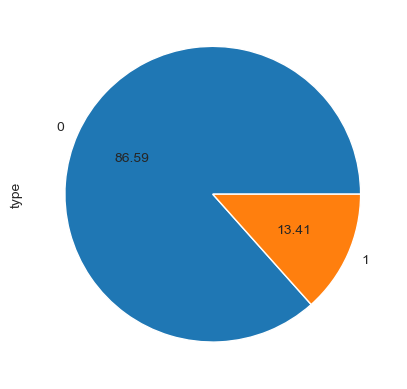

In [9]:
print("Ham (0) vs Spam (1)")
print(df["type"].value_counts())
df["type"].value_counts().plot.pie(autopct="%.2f")
plt.show()

Ham (0) vs Spam (1)
0    747
1    747
Name: type, dtype: int64


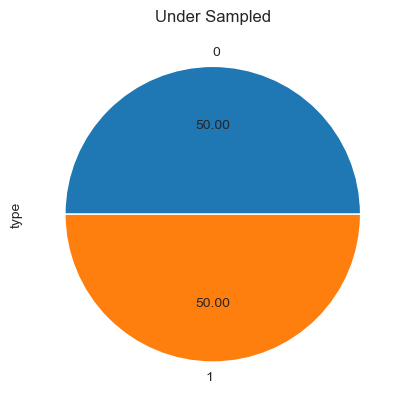

In [10]:
underSampler = RandomUnderSampler(sampling_strategy=1)
x, y = underSampler.fit_resample(df[["sms", "processedSMS", "filteredSMS"]], df["type"])

print("Ham (0) vs Spam (1)")
print(y.value_counts())
ax = y.value_counts().plot.pie(autopct="%.2f")
ax.set_title("Under Sampled")
plt.show()

In [11]:
underSampledSpam = pd.concat([y, x], axis=1)
underSampledSpam.sample(5)

,type,sms,processedSMS,filteredSMS
1102,1,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...,sunshin quiz wkli q win top soni dvd player u ...,"[sunshin, quiz, wkli, q, win, top, soni, dvd, ..."
923,1,1000's of girls many local 2 u who r virgins 2...,1000 girl mani local 2 u r virgin 2 r readi 2 ...,"[1000, girl, mani, local, 2, u, r, virgin, 2, ..."
1107,1,"You are guaranteed the latest Nokia Phone, a 4...",guarante latest nokia phone 40gb ipod mp3 play...,"[guarante, latest, nokia, phone, 40gb, ipod, m..."
452,0,Most of the tiime when i don't let you hug me ...,tiim let hug break tear,"[tiim, let, hug, break, tear]"
152,0,See the forwarding message for proof,see forward messag proof,"[see, forward, messag, proof]"


In [12]:
underSampledSpam.to_csv("undersampled_spam.csv", encoding="latin")